## Boston House Price Predictions


For this project we will investigate the Boston House Price dataset. This is a regression predictive modeling problem in Python. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970.


The attributes are defined as follows (taken from the [UCI
Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing)):


1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10.000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000's dollars

We can see that the input attributes have a mixture of units.

## Load the Dataset

In [123]:
# Load libraries
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import pandas as pd
import numpy as np
from numpy import arange
from pandas import read_csv
from pandas import set_option
from scipy.io import arff

from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error


scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 1.0


In [124]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names)

## Analyze Data

In [125]:
# Dimensions of the dataset
print(dataset.shape)

(506, 14)


We have 506 instances to work with and can confirm the data has 14 attributes including
the output attribute MEDV.

In [89]:
# Let's now take a peek at the first 10 rows of the data
print(dataset.head(10))

       CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO  \
0  6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296     15.3   
1  2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242     17.8   
2  2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242     17.8   
3  3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222     18.7   
4  6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222     18.7   
5  2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222     18.7   
6  8.83e-02  12.5   7.87     0  0.52  6.01   66.6  5.56    5  311     15.2   
7  1.45e-01  12.5   7.87     0  0.52  6.17   96.1  5.95    5  311     15.2   
8  2.11e-01  12.5   7.87     0  0.52  5.63  100.0  6.08    5  311     15.2   
9  1.70e-01  12.5   7.87     0  0.52  6.00   85.9  6.59    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33

In [90]:
# Let's summarize the distribution of each attribute
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


The min and max values
as well the means vary a lot. We are likely going to get better results by rescaling 
the data in some way.

In [91]:
# Now, let's take a look at the correlation between all of the numeric attributes
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

This is interesting. We can see that many of the attributes have a strong correlation (e.g. >0,70 or < -0,70). For example:

 - NOX and INDUS with 0.76
 - DIS and INDUS with -0.71
 - TAX and INDUS with 0.72
 - AGE and NOX with 0.73
 - DIS and NOX with -0.77
 - LSTAT and MEDV with -0.74

### Data Visualisations


#### Unimodal Data Visualisations

Let's look at visualizations of individual attributes.

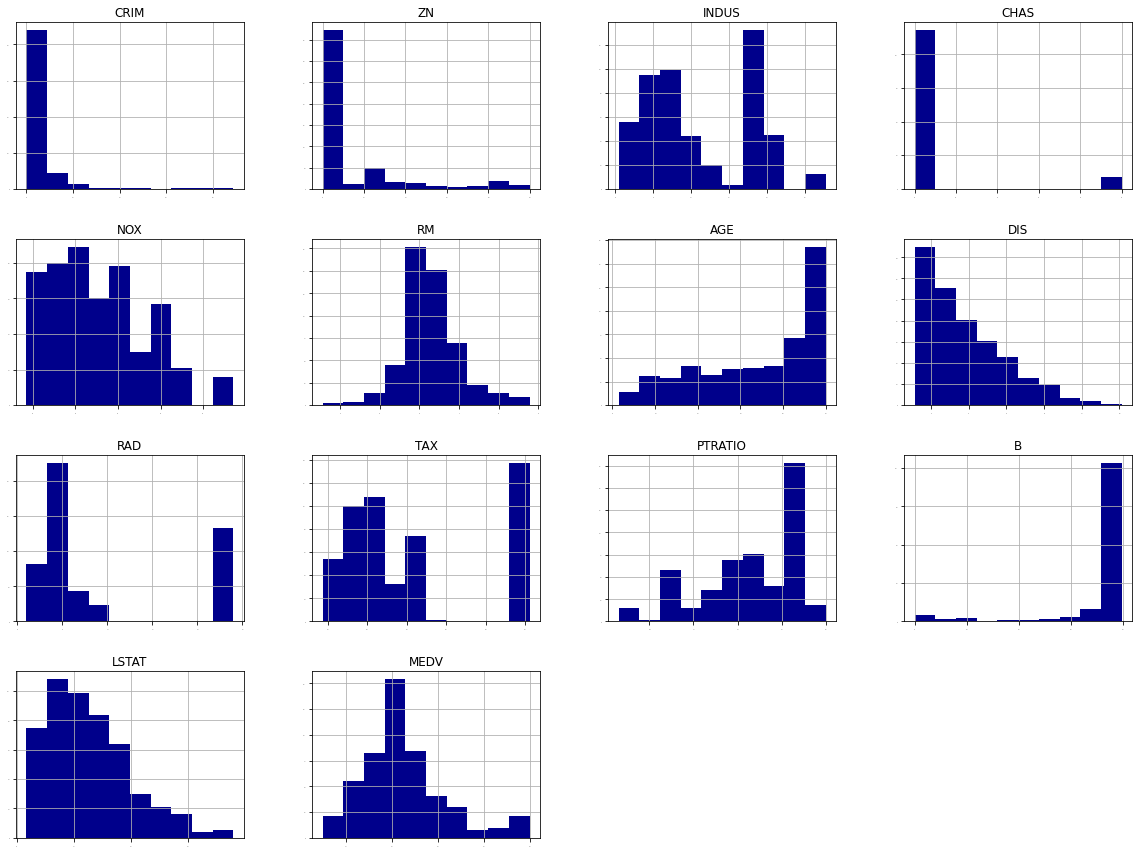

In [58]:
# Histograms
dataset.hist(sharex=False, color = 'darkblue', sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Let's look at the same distributions using density plots that smooth them out a bit.

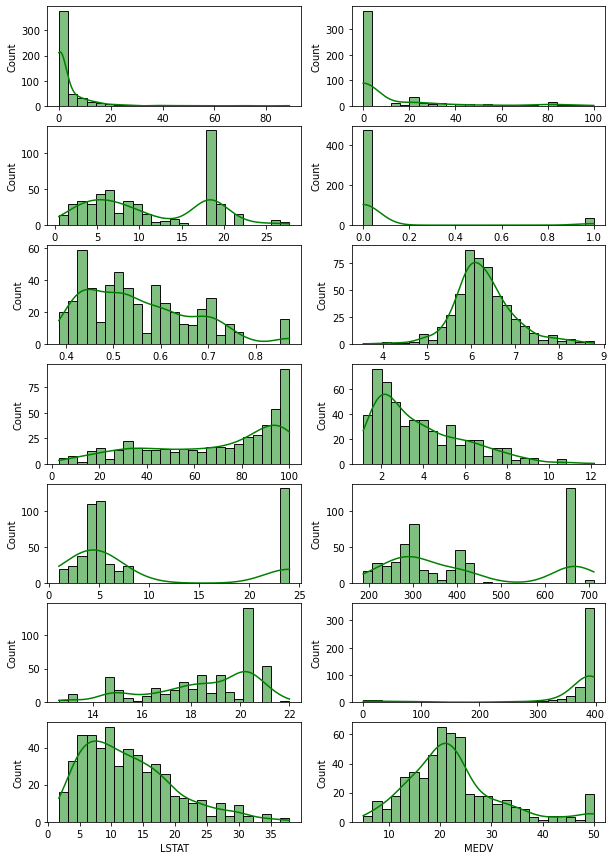

In [134]:
# Histogram and density plots
feature = np.reshape(names, (7,2))
fig, axes = plt.subplots(7, 2, figsize=(10, 15))
for i in range(7):
    for j in range(2):
        sns.histplot(data = dataset, x = feature[i][j], bins=25 , kde=True, ax = axes[i,j])

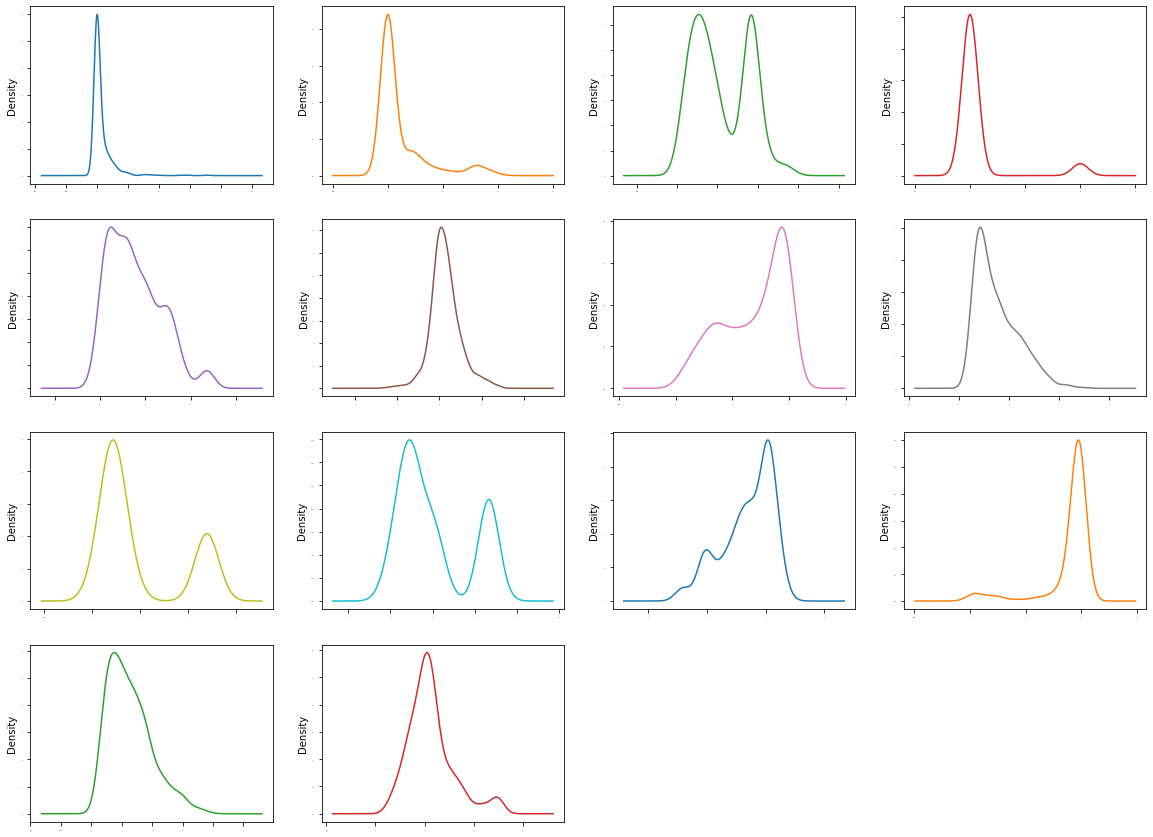

In [122]:
# Density plots
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

We can see possible exponential and bimodal distributions. It also looks like NOX, RM and 
LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

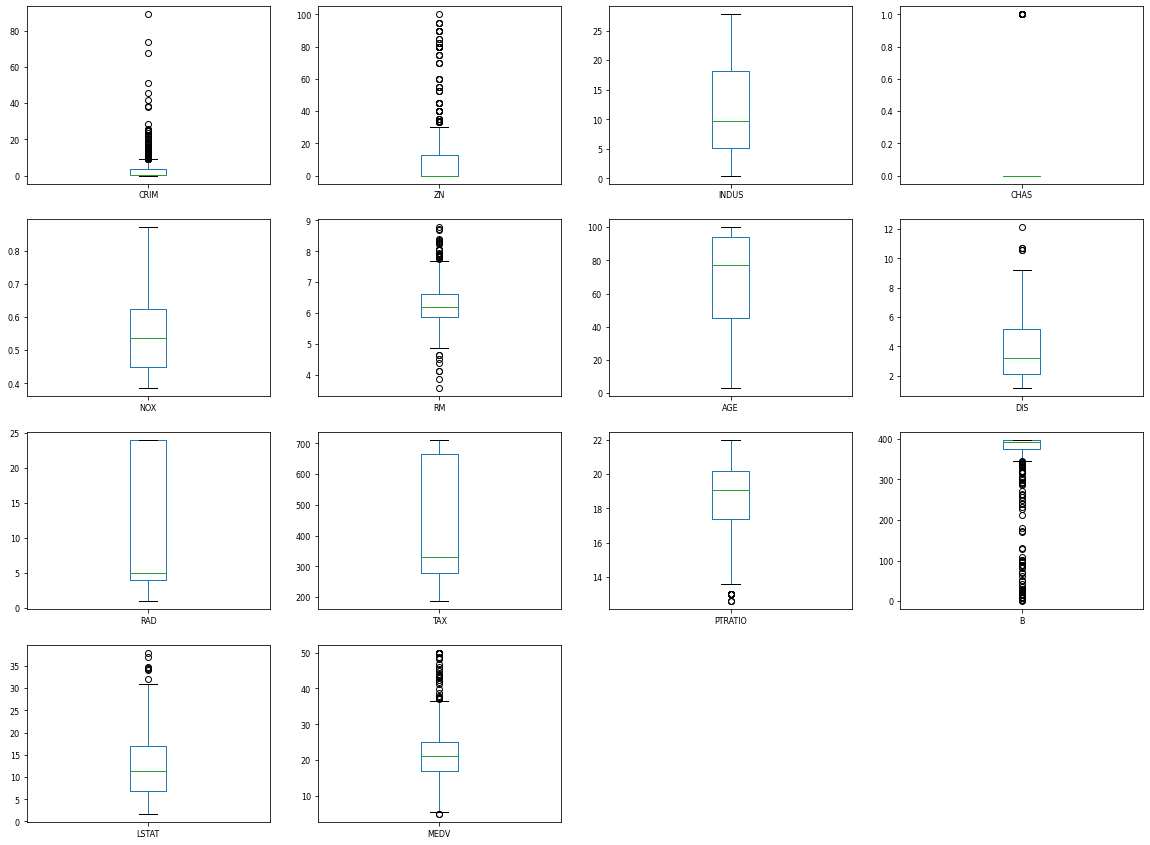

In [68]:
# Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

This helps point out the skew in many distributions so much so that data looks like outliers
(e.g. beyond the whisker of the plots).

#### Multimodal Data Visualisations


Let's look at some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.

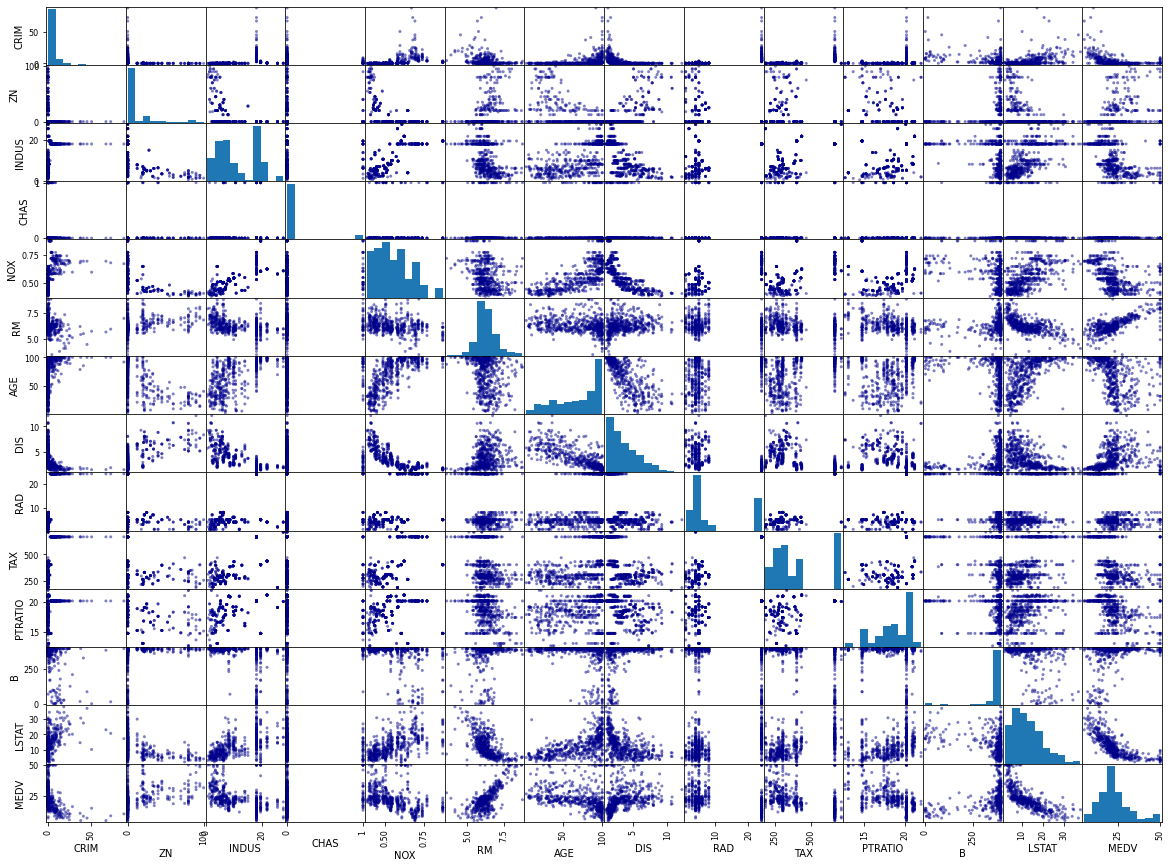

In [11]:
# Scatter plot matrix
scatter_matrix(dataset, color = "darkblue")
pyplot.show()

We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.

Let's also visualize the correlations between the attributes.

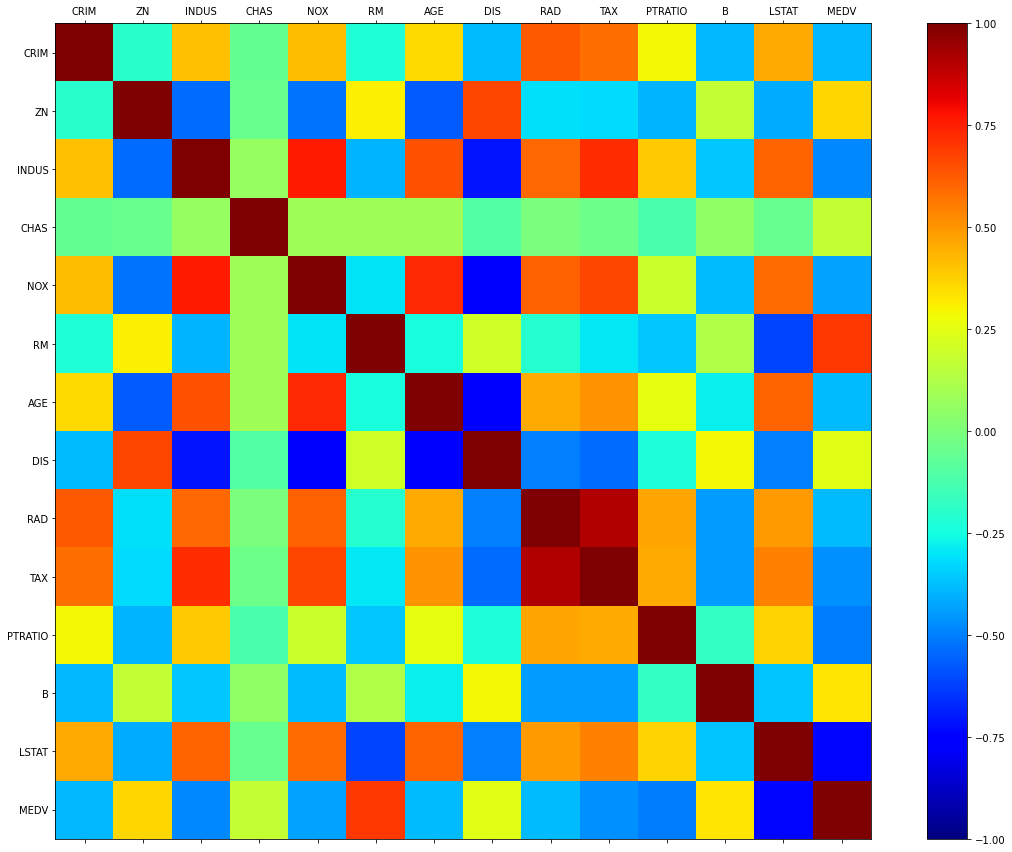

In [116]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none', cmap = "jet")
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
pyplot.show()

The dark red color shows positive correlation whereas the dark blue color shows negative
correlation. We can also see some dark red and dark blue that suggest candidates for removal
to better improve accuracy of models later on.

#### Summary of Ideas


There is a lot of structure in this dataset. We need to think about transforms that we 
could use later to better expose the structure which in turn may improve modeling 
accuracy. So far it would be worth trying:
    
 - Feature selection and removing the most correlated attributes
 - Normalizing the dataset to reduce the effect of differing scales
 - Standardizing the dataset to reduce the effects of differing distributions

With lots of additional time I would also explore the possibility of binning (discretization) of the data. This can often improve accuracy for decision tree algorithms.

### Validation Dataset

In [93]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline



We have no idea what algorithms will do well on this problem. Gut feel suggests regression
algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea. Let's design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [94]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:

 - Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN)
 - Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN)

In [95]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

The algorithms all use default tuning parameters. Let's compare the algorithms. We will
display the mean and standard deviation of MSE for each algorithm as we calculate it and
collect the results for use later.

In [96]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -24.543935 (15.035491)
SVR: -67.824705 (32.801530)


It looks like LR has the lowest MSE, followed closely by CART.

Let's take a look at the distribution of scores across all cross validation folds by algorithm.

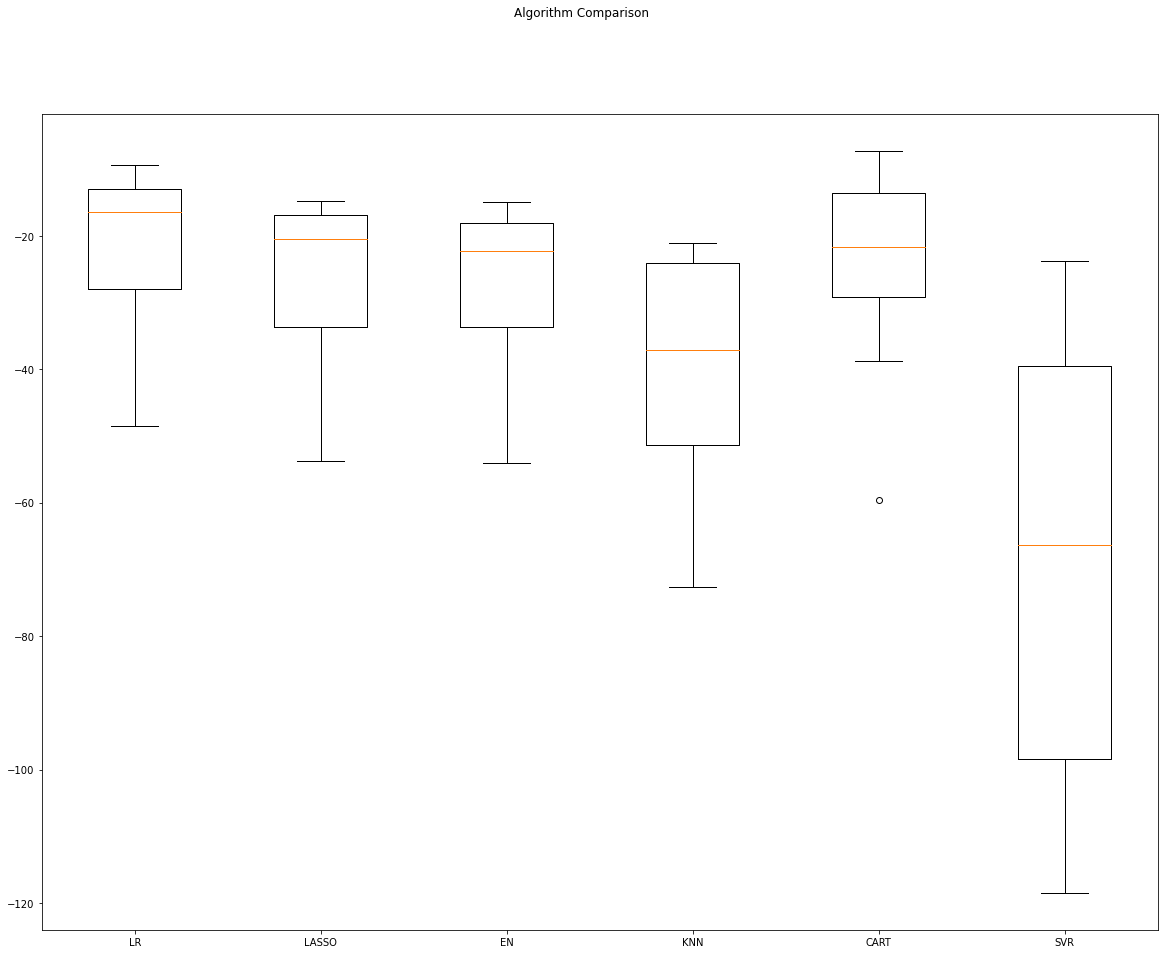

In [97]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see similar distributions for the regression algorithms. The differing scales of the data is probably hurting the skills of all of the algorithms and perhaps more so for SVR. In the next section we will look at running the same algorithms using a standardized copy of the data.

### Evaluate Algorithms: Standardization



We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [101]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -27.224070 (19.163842)
ScaledSVR: -29.570433 (18.052964)


Running the code provides a list of mean squared errors for each algorithm. 
We can see that scaling did have an effect on KNN, driving the error lower than 
the other models.

Let's take a look at the distribution of the scores across the cross validation folds.

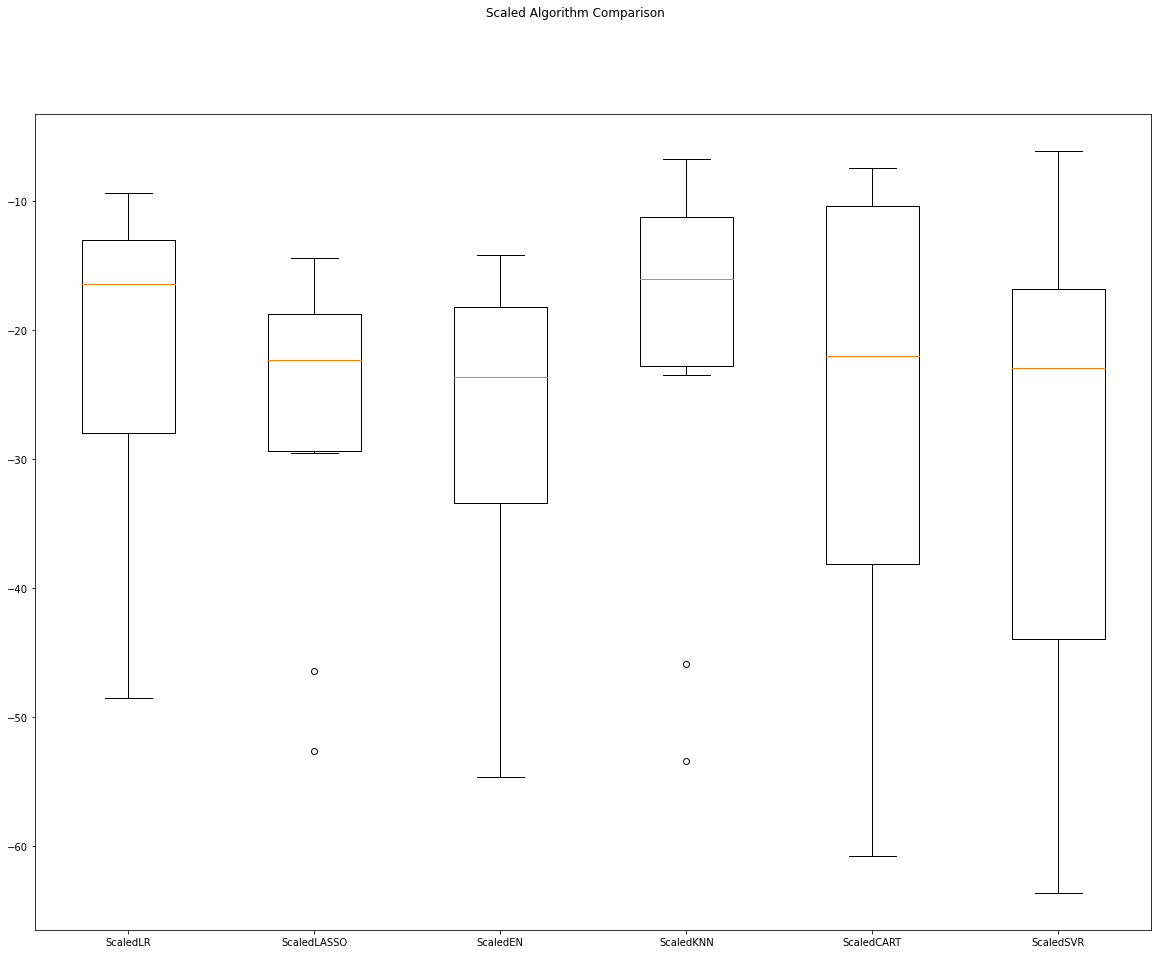

In [102]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that KNN has both a tight distribution of error and has the lowest score.

### Improve Results With Tuning


We know now that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [103]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Display the mean and standard deviation scores and best performing value for k
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


You can see that the best for k (n neighbors) is 1 providing a mean squared error of -19.497829, the best so far.

### Ensemble Methods


Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. We will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

 - Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)
 - Bagging Methods: Random Forests (RF) and Bagging Regressor (BR) 

We will use the same test harness as before, 10-fold cross validation and pipelines that
standardize the training data for each fold.

In [109]:
from sklearn.ensemble import BaggingRegressor
# Ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledBR', Pipeline([('Scaler', StandardScaler()),('BR',
BaggingRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.669051 (8.539373)
ScaledGBM: -10.952786 (8.698294)
ScaledRF: -12.692083 (9.638499)
ScaledBR: -13.483728 (9.341573)


Running the above code calculates the mean squared error for each method using the default
parameters. We can see that we're generally getting better scores than our linear and nonlinear
algorithms in previous sections.

We can also plot the distribution of scores across the cross validation folds.

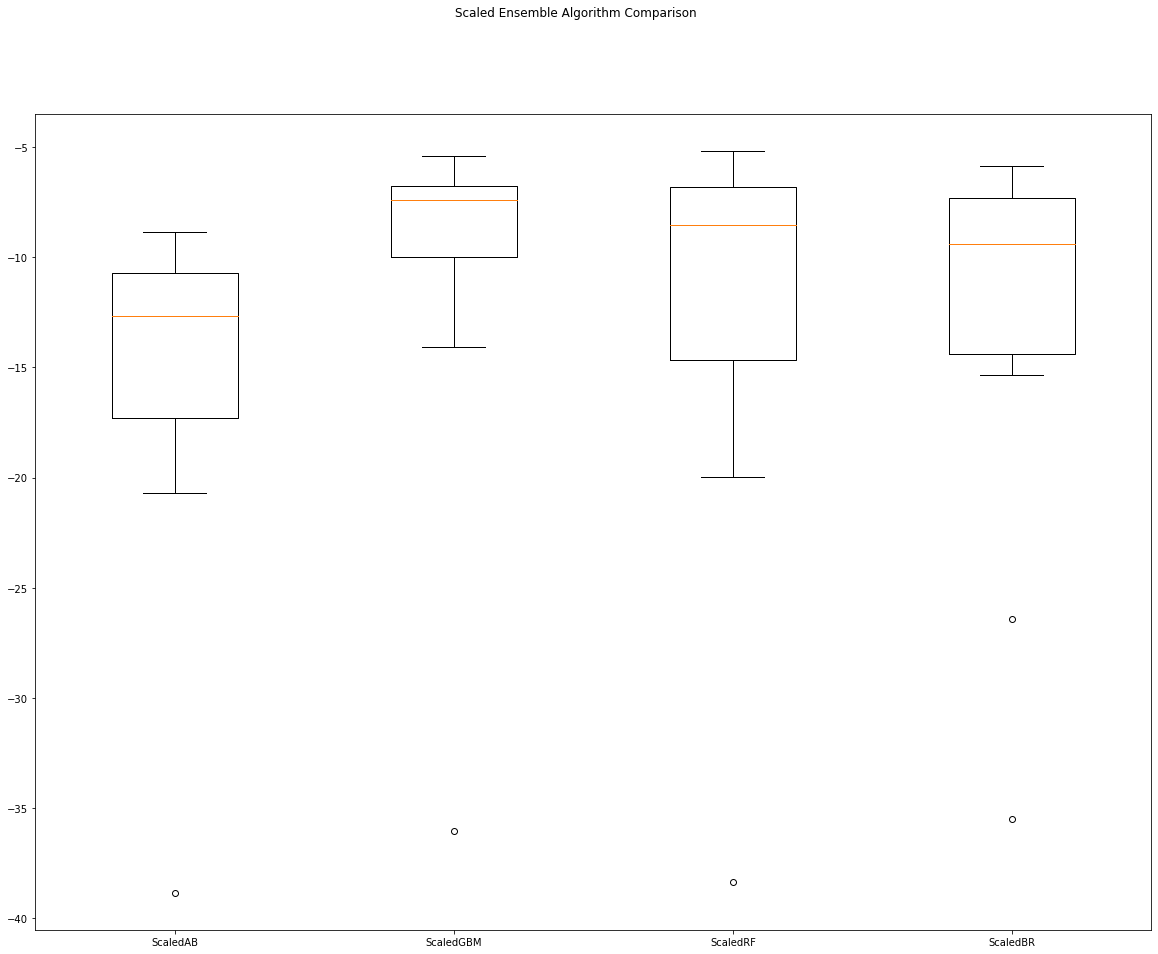

In [110]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like that Gradient Boosting has a better mean score. We can probably do better, given that the ensemble techniques used the default parameters.
Now we will look at tuning the Gradient Boosting to further lift the performance.

### Tune Ensemble Methods


The default number of boosting stages to perform (n_estimators) is 100. This is a good
candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. We will
look at tuning the number of stages for gradient boosting. Below we define a parameter grid, n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross validation.

In [112]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Summarize the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.379670 using {'n_estimators': 400}
-10.813179 (4.856738) with: {'n_estimators': 50}
-10.057375 (4.566986) with: {'n_estimators': 100}
-9.718097 (4.404730) with: {'n_estimators': 150}
-9.565306 (4.394355) with: {'n_estimators': 200}
-9.477007 (4.376433) with: {'n_estimators': 250}
-9.453795 (4.385228) with: {'n_estimators': 300}
-9.394901 (4.367860) with: {'n_estimators': 350}
-9.379670 (4.382001) with: {'n_estimators': 400}


We can see that the best configuration was n_estimators=400 resulting in a mean squared
error of -9.379670, which is better than the untuned method.

### Finalize Model


Now, let's finalize the model and prepare it for general use. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training. Then, we will evaluate the model on validation dataset.

In [113]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

We can then scale the inputs for the validation dataset and generate predictions.

In [114]:
# Transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


We can see that the estimated mean squared error is 11.9, close to our estimate of -9.4.